#Import libraries

In [1]:
import pandas as pd
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt


In [4]:
#inputfile = 'AbbVie_Capstone.xlsx'
#df1 = pd.read_excel(inputfile, sheet_name = 'Interaction')


#df1.groupby('patient_id').count()
#df2 = pd.DataFrame(df1.query("patient_id == 204")["service"])
#df2.groupby('service').count()

#df1.groupby('service').count()
#df2 = pd.DataFrame(df1.query("service == 'App'")["patient_id"])
#df2.groupby('patient_id').count()

In [2]:
df1 = pd.read_csv('Interaction+demography+payor.csv')
df2 = pd.read_csv('Interaction+Email.csv')

C:\Users\RanjaSarkar\AppData\Local\Temp\ipykernel_21060\1674476410.py:2: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('Interaction+Email.csv')


In [3]:
df_1 = df1[['patient_id', 'service', 'date of interaction', 'enrolled_channel','gender', 'age', 'payor']]

In [4]:
df_2 = df2[['patient_id', 'service', 'date of interaction', 'HCP type', 'enrollment_status', 'Months on program','Months on therapy', 'territory']]


In [5]:
df_1.shape, df_2.shape

((2540922, 7), (2885871, 8))

In [6]:
dff = pd.merge(df_1, df_2, how = 'outer')
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15713603 entries, 0 to 15713602
Data columns (total 12 columns):
 #   Column               Dtype  
---  ------               -----  
 0   patient_id           int64  
 1   service              object 
 2   date of interaction  object 
 3   enrolled_channel     object 
 4   gender               object 
 5   age                  object 
 6   payor                object 
 7   HCP type             object 
 8   enrollment_status    object 
 9   Months on program    float64
 10  Months on therapy    float64
 11  territory            object 
dtypes: float64(2), int64(1), object(9)
memory usage: 1.5+ GB


In [7]:
#len(dff[dff.duplicated()])
df0 = dff.drop_duplicates()

In [39]:
#df0.count()

In [8]:
df0.dropna(inplace = True) #drop blanks from columns in the dataframe

C:\Users\RanjaSarkar\AppData\Local\Temp\ipykernel_21060\14065172.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0.dropna(inplace = True) #drop blanks from columns in the dataframe


In [9]:
df0.head(5)

,patient_id,service,date of interaction,enrolled_channel,gender,age,payor,HCP type,enrollment_status,Months on program,Months on therapy,territory
1792,20401322,Email,2017-06-28 00:00:00,skype,F,41-65,Commercial,type2,Specialist,48.0,46.6,Unknown
1795,20401322,Email,2017-06-28 00:00:00,skype,F,41-65,Commercial,type2,Specialist,48.0,46.6,t2
1797,20401322,Email,2017-06-28 00:00:00,skype,F,41-65,Commercial,type2,Specialist,56.0,54.6,Unknown
1822,20401322,HPS_low,2017-06-28 00:00:00,skype,F,41-65,Commercial,type2,Specialist,48.0,46.6,Unknown
1825,20401322,HPS_low,2017-06-28 00:00:00,skype,F,41-65,Commercial,type2,Specialist,48.0,46.6,t2


In [41]:
cost = []                 #cost is SSE (sum of squared errors)
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters = num_clusters, init = "random", n_init = 3, verbose = False)
    #n_init = #times the algorithm will be run with different centroid seeds
    kmode.fit_predict(df0)
    cost.append(kmode.cost_)

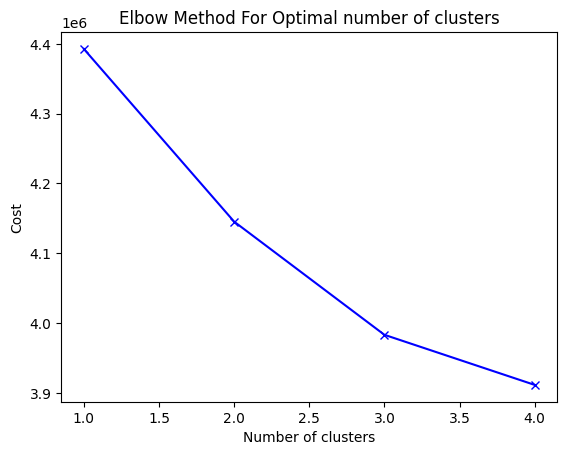

In [43]:
plt.plot(K, cost, 'bx-') 
plt.xlabel('Number of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal number of clusters')
plt.show()

In [54]:

kmode = KModes(n_clusters = 4, init = "random", n_init = 3, verbose = False)
clusters = kmode.fit_predict(df0)
clusters

array([0, 0, 0, ..., 0, 0, 0], dtype=uint16)

Feature relevance for categorical variables

In [ ]:
#from scipy.stats import f_oneway

#def calc_feature_relevance(df, feature, target):
#    idxs_by_class = [df[df[target_name] == v].index for v in df[target_name].unique()]
#    groups = [df.loc[class_idxs, feature].values for class_idxs in idxs_by_class]
#    return f_oneway(groups).statistic